In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3607).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3961).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3958).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3643).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4088).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3679).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3506).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4161).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4121).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3534).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3596).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3460).jpg
/kag

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math 

import datetime
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , SeparableConv2D, MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ReduceLROnPlateau 
from keras import backend as K
from keras import optimizers
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix, f1_score, accuracy_score
import tensorflow as tf
import tensorflow_addons as tfa

In [3]:
#Training data
train_datagen_resnet = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.01
        )

train_generator_resnet = train_datagen_resnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='training'
        )


Found 5094 images belonging to 3 classes.


In [4]:
val_datagen_resnet = ImageDataGenerator(rescale=1./255)

val_generator_resnet = train_datagen_resnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='validation'
        )

Found 50 images belonging to 3 classes.


In [5]:
test_datagen_resnet = ImageDataGenerator(rescale=1./255)

test_generator_resnet = test_datagen_resnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/test',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [6]:
from keras.applications.resnet50 import ResNet50

In [7]:
rn50=ResNet50(input_shape=(224,224,3),
                             include_top=False,
                             weights='imagenet')

for layer in rn50.layers:
    layer.trainable=False

94773248/94765736 [==============================] - 1s 0us/step


In [8]:
last_layer=rn50.layers[-1]
last_output = last_layer.output

In [9]:
x=layers.GlobalAveragePooling2D()(last_output)
x=layers.Dense(3,activation='softmax')(x)

resnet50=keras.Model(rn50.input,x)

In [10]:
resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
resnet50.compile(optimizer=tfa.optimizers.SGDW(lr=0.1, momentum=0.9, weight_decay=0.0001),
              loss='categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
history_resnet=resnet50.fit_generator(train_generator_resnet,validation_data=val_generator_resnet,epochs=20,verbose=2)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
40/40 - 239s - loss: 56.8533 - accuracy: 0.5116 - val_loss: 24.3566 - val_accuracy: 0.0800
Epoch 2/20
40/40 - 164s - loss: 39.7485 - accuracy: 0.4965 - val_loss: 36.2204 - val_accuracy: 0.6800
Epoch 3/20
40/40 - 166s - loss: 73.0387 - accuracy: 0.5353 - val_loss: 38.6583 - val_accuracy: 0.2400
Epoch 4/20
40/40 - 164s - loss: 45.9167 - accuracy: 0.4990 - val_loss: 25.7700 - val_accuracy: 0.6800
Epoch 5/20
40/40 - 167s - loss: 23.1316 - accuracy: 0.5821 - val_loss: 7.1377 - val_accuracy: 0.2200
Epoch 6/20
40/40 - 164s - loss: 27.7019 - accuracy: 0.5628 - val_loss: 16.9209 - val_accuracy: 0.4800
Epoch 7/20
40/40 - 167s - loss: 27.4849 - accuracy: 0.5579 - val_loss: 42.6235 - val_accuracy: 0.1600
Epoch 8/20
40/40 - 173s - loss: 17.9815 - accuracy: 0.5811 - val_loss: 23.5345 - val_accuracy: 0.2200
Epoch 9/20
40/40 - 171s - loss: 32.2652 - accuracy: 0.5145 - val_loss: 37.3619 - val_accuracy: 0.6800
Epoch 10/20
40/40 - 174s - loss: 38.1678 - accuracy: 0.5255 - val_loss: 72.0709 - v

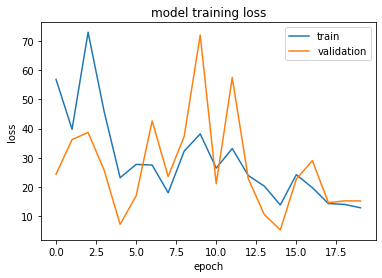

In [13]:
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

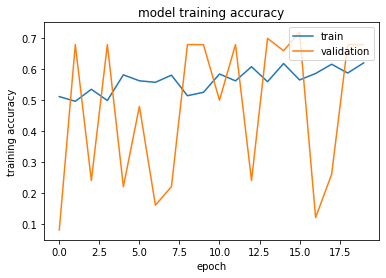

In [14]:
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('model training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [15]:
#evaluate the test data
x=resnet50.evaluate_generator(test_generator_resnet)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [16]:
print(f'Testing loss: {x[0]}')
print(f'Testing accuracy: {x[1]}')

Testing loss: 15.619284629821777
Testing accuracy: 0.6638198494911194


In [17]:
#predicting the class of each image and storing it in array
y_predictions=[]
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/COVID19"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/COVID19/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = resnet50.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/NORMAL"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/NORMAL/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = resnet50.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))
    
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = resnet50.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

y_predictions=np.array(y_predictions)

In [18]:
test_generator_resnet.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [19]:
print(classification_report(test_generator_resnet.classes,y_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print(confusion_matrix(test_generator_resnet.classes,y_predictions))

[[  0   0 116]
 [  0   0 317]
 [  0   0 855]]


<AxesSubplot:>

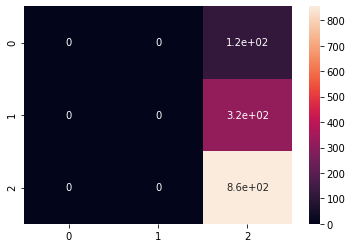

In [21]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_generator_resnet.classes,y_predictions), annot=True)

In [22]:
train_datagen_vgg19 = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.01
        )

train_generator_vgg19 = train_datagen_vgg19.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='training')

Found 5094 images belonging to 3 classes.


In [23]:
val_datagen_vgg19 = ImageDataGenerator(rescale=1./255)

val_generator_vgg19 = train_datagen_vgg19.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='validation')

Found 50 images belonging to 3 classes.


In [24]:
test_datagen_vgg19 = ImageDataGenerator(rescale=1./255)

test_generator_vgg19 = test_datagen_vgg19.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/test',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [25]:
from keras.applications.vgg19 import VGG19

In [26]:
vgg_model=VGG19(input_shape=(224,224,3),
                             include_top=False,
                             weights='imagenet')

for layer in vgg_model.layers:
    layer.trainable=False

80142336/80134624 [==============================] - 1s 0us/step


In [27]:
last_layer=vgg_model.layers[-1]
last_output = last_layer.output

In [28]:
x=layers.Flatten()(last_output)
x=layers.Dense(4096,activation='relu')(x)
x=layers.Dropout(0.5)(x)
x=layers.Dense(4096,activation='relu')(x)
x=layers.Dropout(0.5)(x)
x=layers.Dense(1,activation='sigmoid')(x)

vgg19=keras.Model(vgg_model.input,x)

In [29]:
vgg19.compile(optimizer=tfa.optimizers.SGDW(lr=0.01, momentum=0.9, weight_decay=0.0005),
              loss='categorical_crossentropy',
               metrics=['accuracy'])

In [30]:
vgg19.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [31]:
history_vgg19=vgg19.fit_generator(train_generator_vgg19,validation_data=val_generator_vgg19,epochs=20,verbose=2)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20


InvalidArgumentError:  Matrix size-incompatible: In[0]: [128,3], In[1]: [4096,1]
	 [[node gradient_tape/model_1/dense_3/MatMul (defined at /opt/conda/lib/python3.7/site-packages/tensorflow_addons/optimizers/weight_decay_optimizers.py:146) ]] [Op:__inference_train_function_86942]

Errors may have originated from an input operation.
Input Source operations connected to node gradient_tape/model_1/dense_3/MatMul:
 model_1/dense_3/MatMul/ReadVariableOp (defined at <ipython-input-31-0d0f7151ad7f>:1)

Function call stack:
train_function


In [ ]:
vgg19.evaluate_generator(test_generator_vgg19)

In [ ]:
plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(f'Testing loss: {x[0]}')
print(f'Testing accuracy: {x[1]}')

In [ ]:
y_predictions=[]
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/COVID19"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/COVID19/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = vgg19.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/NORMAL"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/NORMAL/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = vgg19.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))
    
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = vgg19.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

y_predictions=np.array(y_predictions)

In [ ]:
test_generator_vgg19.class_indices

In [ ]:
print(classification_report(test_generator_vgg19.classes,y_predictions))

In [ ]:
print(confusion_matrix(test_generator_vgg19.classes,y_predictions))

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_generator_vgg19.classes,y_predictions), annot=True)

In [ ]:
train_datagen_resnet = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.01)

train_generator_resnet = train_datagen_resnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='training'
        )

In [ ]:
val_datagen_resnet = ImageDataGenerator(rescale=1./255)

val_generator_resnet = train_datagen_resnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='validation'
        )

In [ ]:
test_datagen_resnet = ImageDataGenerator(rescale=1./255)

test_generator_resnet = test_datagen_resnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/test',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical')

In [ ]:
from keras.applications.resnet50 import ResNet50

In [ ]:
rn50=ResNet50(input_shape=(224,224,3),
                             include_top=False,
                             weights='imagenet')

for layer in rn50.layers:
    layer.trainable=False

In [ ]:
last_layer=rn50.layers[-1]
last_output = last_layer.output

In [ ]:
x=layers.GlobalAveragePooling2D()(last_output)
x=layers.Dense(3,activation='softmax')(x)

resnet50=keras.Model(rn50.input,x)

In [ ]:
resnet50.summary()

In [ ]:
resnet50.compile(optimizer='adam',
              loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history_resnet=resnet50.fit_generator(train_generator_resnet,validation_data=val_generator_resnet,epochs=20,verbose=2)

In [ ]:
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
x=resnet50.evaluate_generator(test_generator_resnet)

In [ ]:
print(f'Testing loss: {x[0]}')
print(f'Testing accuracy: {x[1]}')

In [ ]:
y_predictions=[]
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/COVID19"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/COVID19/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = resnet50.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/NORMAL"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/NORMAL/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = resnet50.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))
    
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = resnet50.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

y_predictions=np.array(y_predictions)

In [ ]:
test_generator_resnet.class_indices

In [ ]:
print(classification_report(test_generator_resnet.classes,y_predictions))

In [ ]:
print(confusion_matrix(test_generator_resnet.classes,y_predictions))

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_generator_resnet.classes,y_predictions), annot=True)